

<div style="background-color: olive; padding:40px; font-size: 40px;">
             Exploratory Analysis
    

   
</div>

In [1]:
import pandas as pd

import numpy as np

import wrangle_zillow as wz

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from scipy.stats import shapiro ,stats

import seaborn as sns

import statsmodels.api as sm  # Import the statsmodels library



# Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.



## Wrangle data (acquire, prep, summarize, split)

In [25]:
# Fetch the Zillow data
zillow_data = wz.get_zillow_data()

In [26]:
#Using cleaned Zillow data (zillow_cleaned.csv)for further analysis

# Specify the path to the CSV file
csv_file_path = 'zillow_cleaned.csv'

# Read the cleaned CSV file into a DataFrame
zillow = pd.read_csv(csv_file_path)


In [4]:
# Summarize the Zillow data
wz.summarize(zillow)

Shape of Data: 
(52317, 30)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52317 entries, 0 to 52316
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52317 non-null  int64  
 1   id                            52317 non-null  int64  
 2   parcelid                      52317 non-null  int64  
 3   bathroomcnt                   52317 non-null  float64
 4   bedroomcnt                    52317 non-null  float64
 5   calculatedbathnbr             52184 non-null  float64
 6   calculatedfinishedsquarefeet  52238 non-null  float64
 7   finishedsquarefeet12          52073 non-null  float64
 8   fips                          52317 non-null  float64
 9   fullbathcnt                   52184 non-null  float64
 10  latitude                      52317 non-null  float64
 11  longitude                     52317 non-null  float64
 12  lotsizesquarefeet        

In [5]:
missing_summary = wz.missing_value_summary(zillow)
missing_summary

,num_rows_missing,pct_rows_missing
name,,
Unnamed: 0,0,0.000000
id,0,0.000000
parcelid,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
calculatedbathnbr,133,0.002542
calculatedfinishedsquarefeet,79,0.001510
finishedsquarefeet12,244,0.004664
fips,0,0.000000


In [27]:
#Renaming and groupings for county

zillow = wz.prep_zillow(zillow)

In [28]:
zillow.head()

,unnamed:_0,id,parcelid,bathrooms,bedrooms,calculatedbathnbr,area,finishedsquarefeet12,county,fullbathcnt,...,taxvalue,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,propertylandusedesc,la,orange,ventura
0,0,1727539,14297519,3.5,4,3.5,3100,3100.0,Orange,3.0,...,1023282,2016.0,537569.0,6.059063e+13,0.025595,2017-01-01,Single Family Residential,0,1,0
1,1,1387261,17052889,1.0,2,1.0,1465,1465.0,Ventura,1.0,...,464000,2016.0,376000.0,6.111001e+13,0.055619,2017-01-01,Single Family Residential,0,0,1
2,2,11677,14186244,2.0,3,2.0,1243,1243.0,Orange,2.0,...,564778,2016.0,479489.0,6.059022e+13,0.005383,2017-01-01,Single Family Residential,0,1,0
3,3,2288172,12177905,3.0,4,3.0,2376,2376.0,LA,3.0,...,145143,2016.0,36225.0,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,1,0,0
4,4,781532,12095076,3.0,4,3.0,2962,2962.0,LA,3.0,...,773303,2016.0,496619.0,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,1,0,0


In [29]:
# Split the data  split_data

train, validate, test = wz.split_data(zillow)



In [30]:
train.head()

,unnamed:_0,id,parcelid,bathrooms,bedrooms,calculatedbathnbr,area,finishedsquarefeet12,county,fullbathcnt,...,taxvalue,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,propertylandusedesc,la,orange,ventura
1926,1926,957783,11278278,2.0,3,2.0,1238,1238.0,LA,2.0,...,132546,2016.0,26509.0,6.037901e+13,-0.003349,2017-01-13,Single Family Residential,1,0,0
27526,27527,221190,14391898,3.0,5,3.0,2869,2869.0,Orange,3.0,...,864750,2016.0,558517.0,6.059063e+13,0.021583,2017-05-30,Single Family Residential,0,1,0
17570,17571,1291832,12831131,1.0,3,1.0,1425,1425.0,LA,1.0,...,621319,2016.0,497056.0,6.037500e+13,-0.015868,2017-04-14,Single Family Residential,1,0,0
4657,4657,706252,11829226,1.0,3,1.0,1363,1363.0,LA,1.0,...,31019,2016.0,6811.0,6.037531e+13,0.169167,2017-01-31,Single Family Residential,1,0,0
6654,6654,1196157,11192125,3.0,4,3.0,1871,1871.0,LA,3.0,...,205964,2016.0,51490.0,6.037910e+13,-0.009017,2017-02-15,Single Family Residential,1,0,0


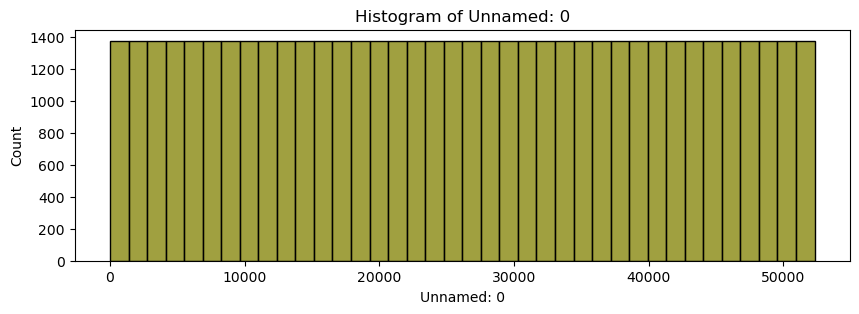

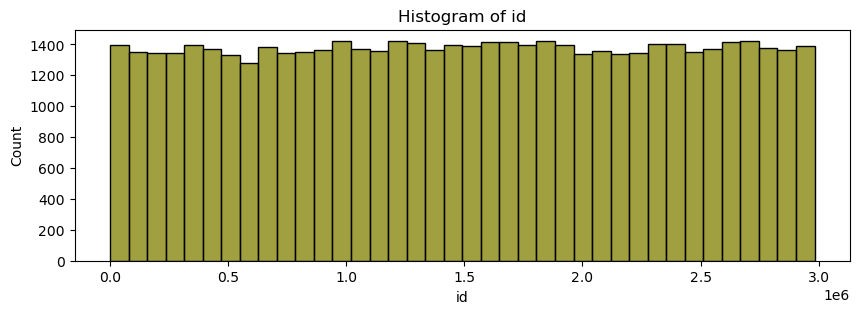

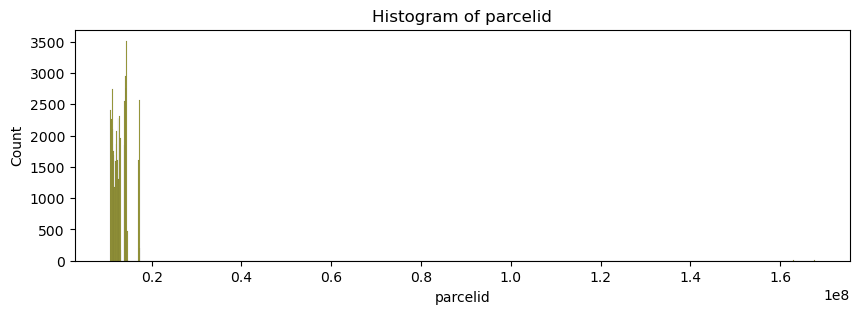

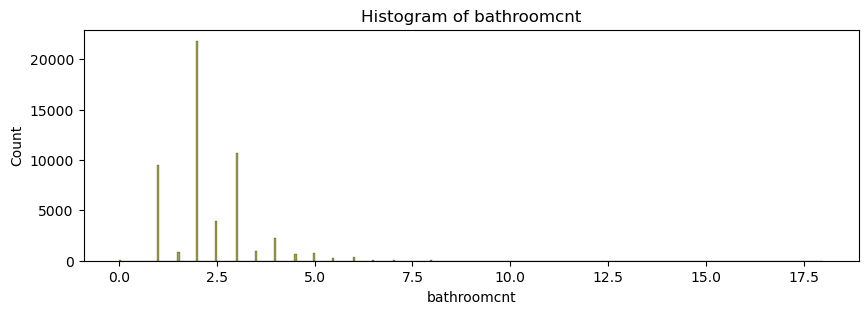

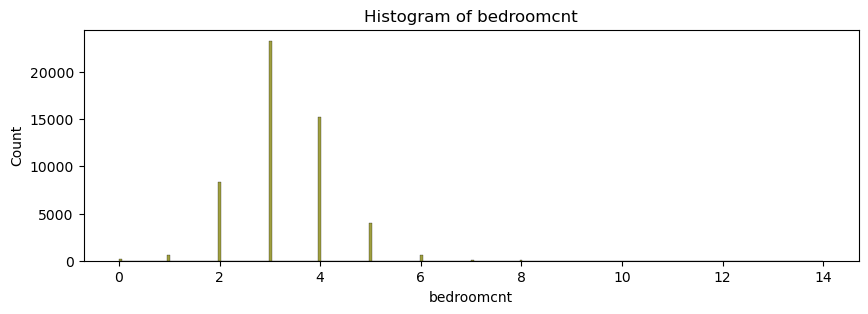

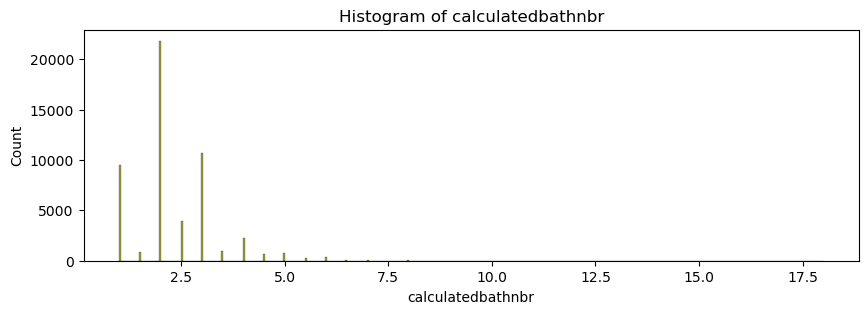

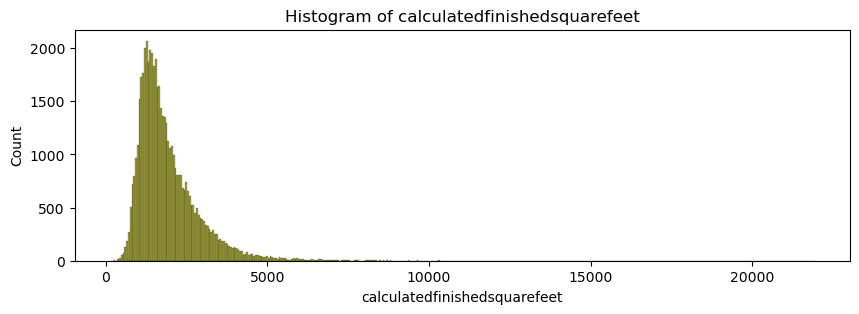

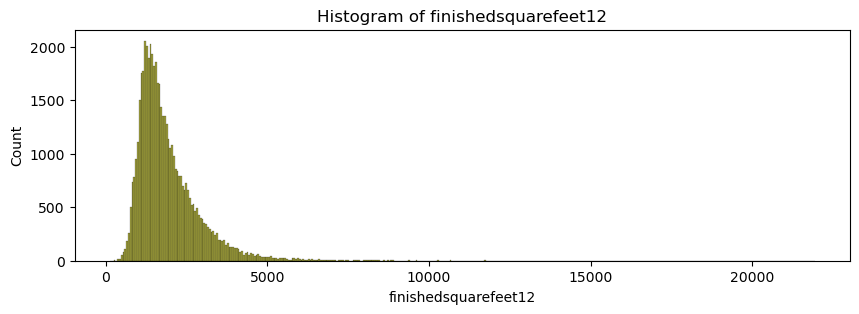

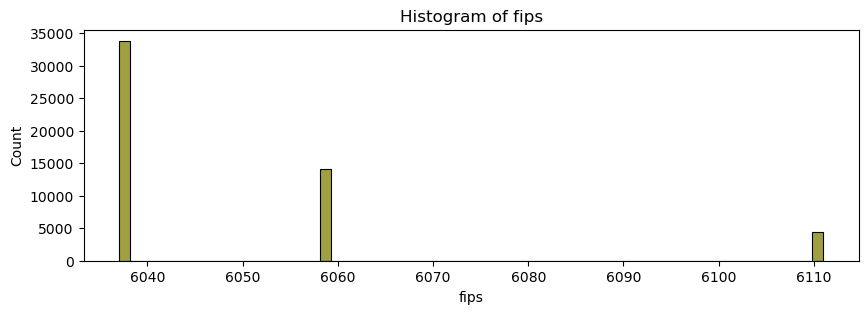

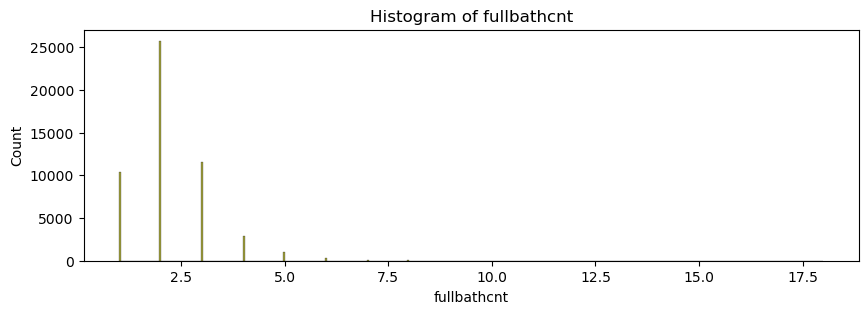

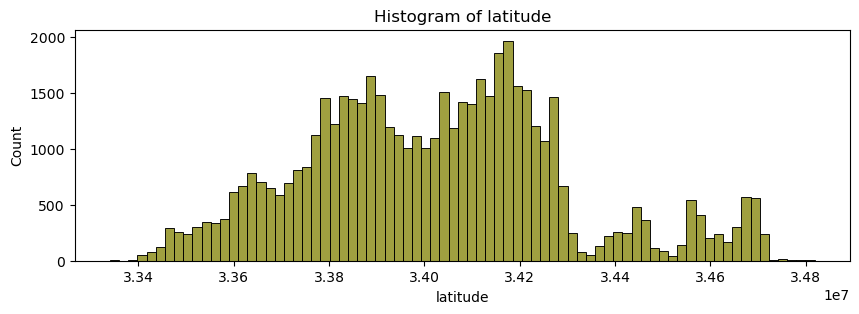

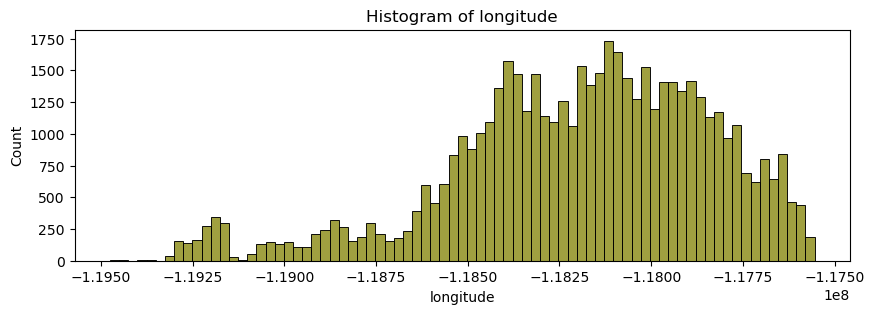

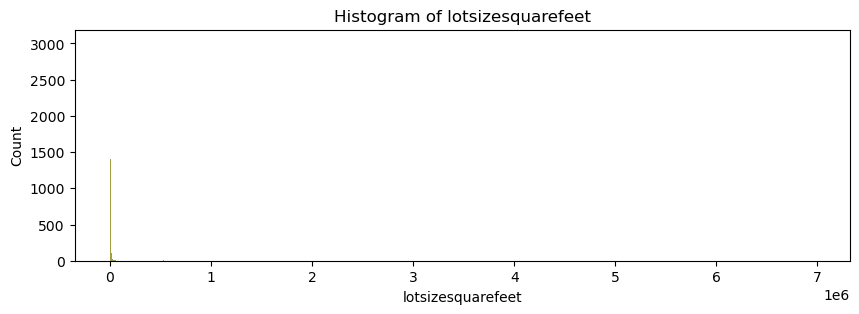

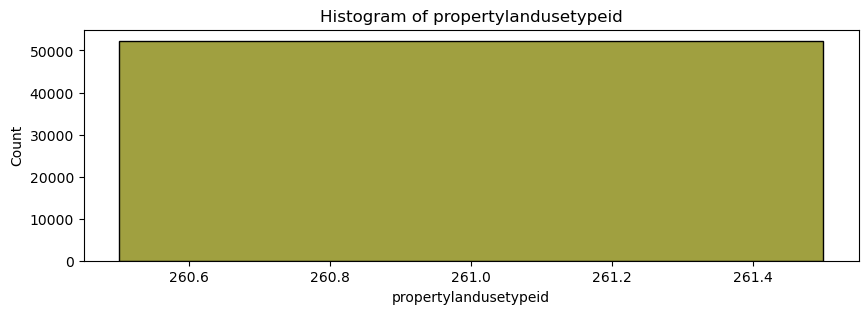

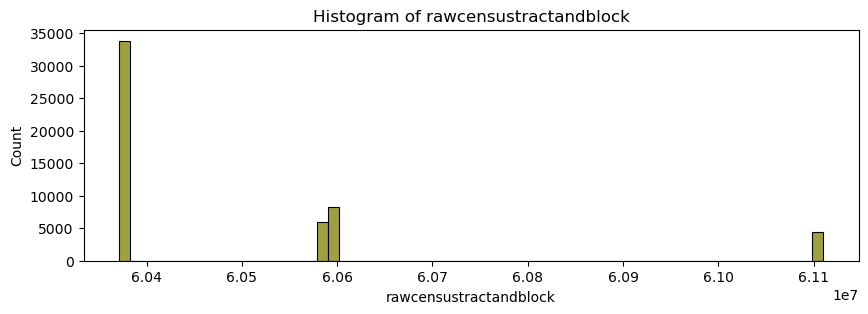

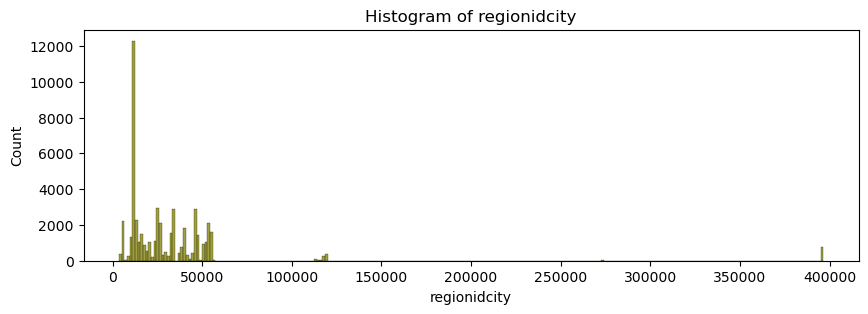

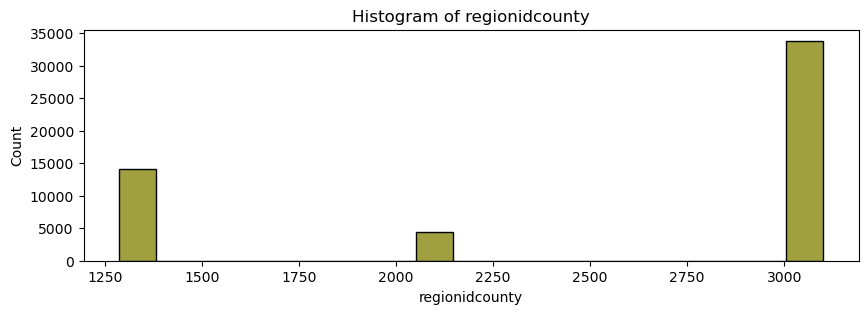

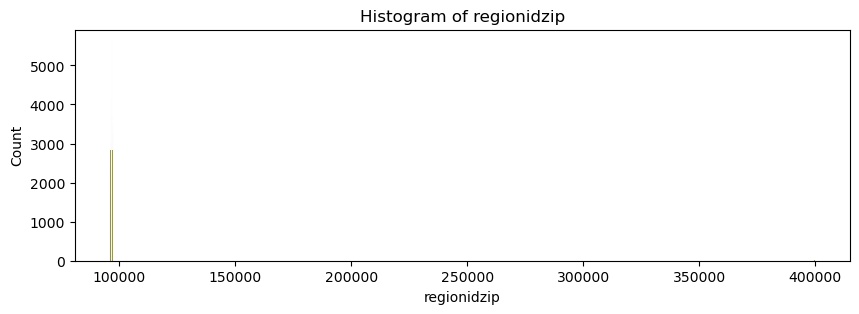

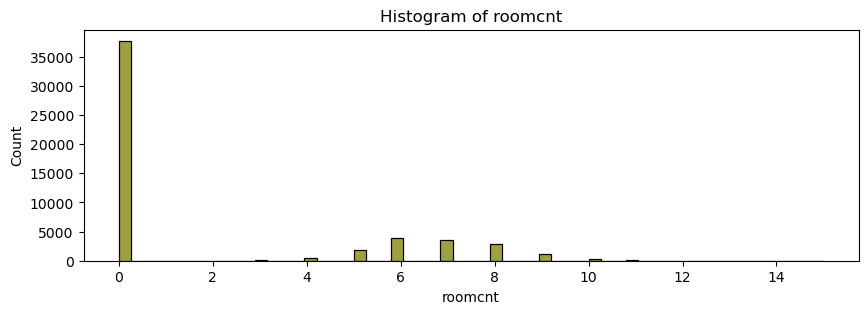

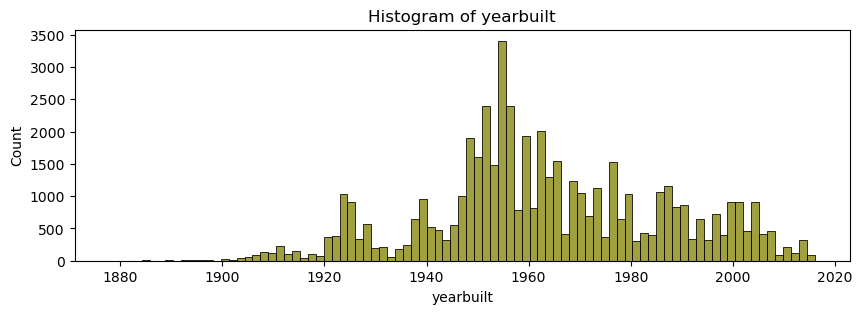

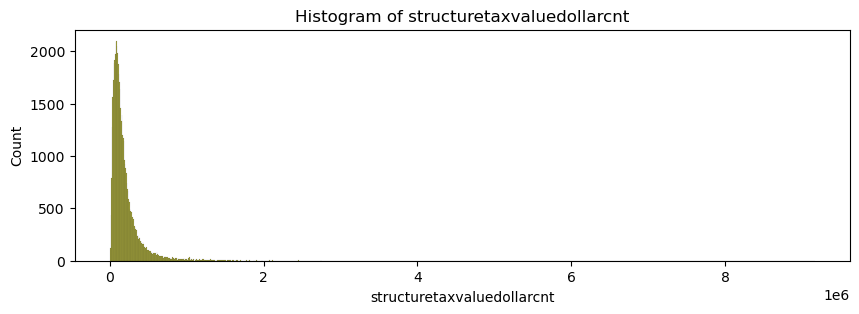

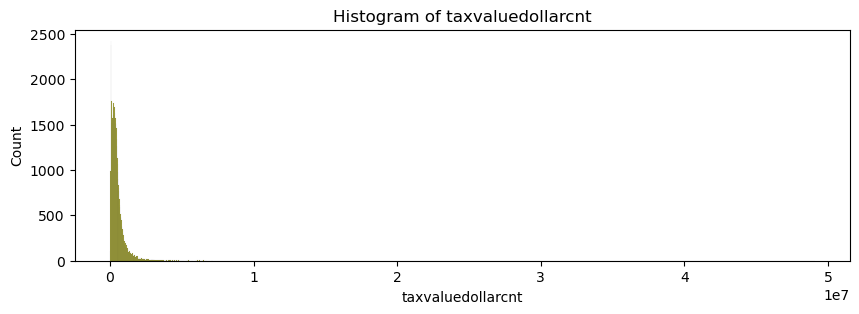

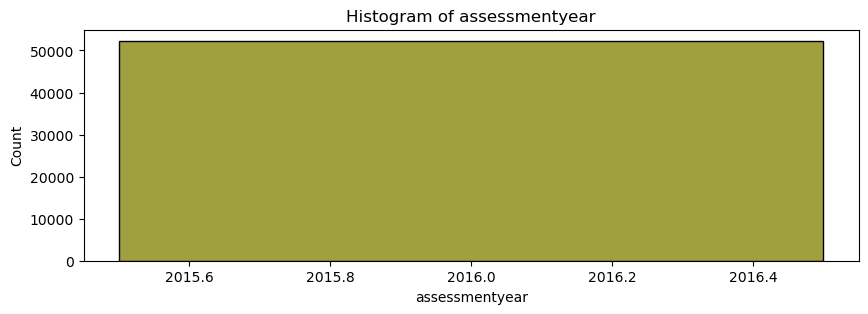

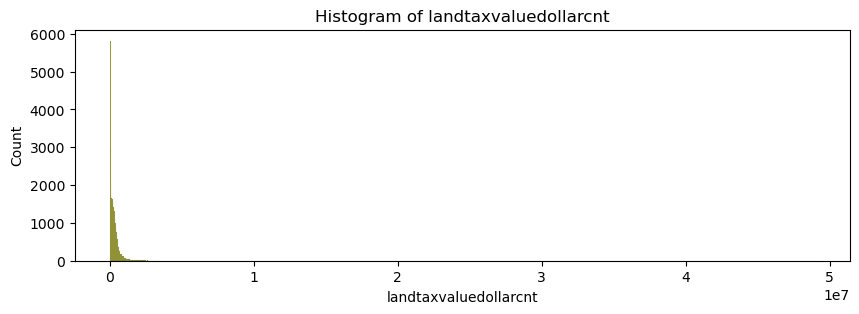

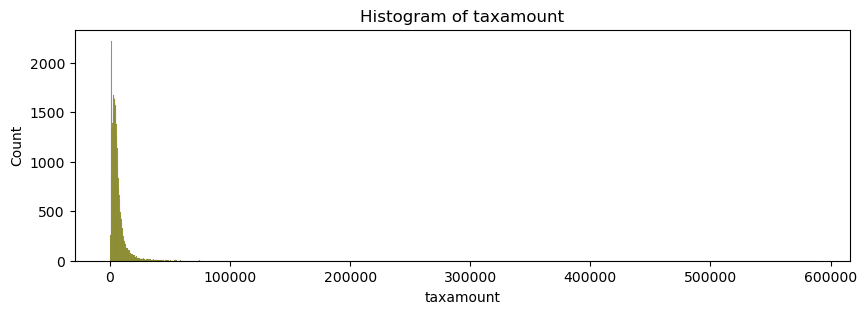

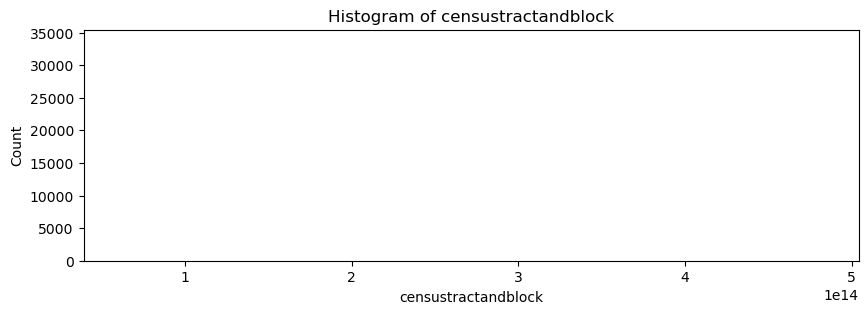

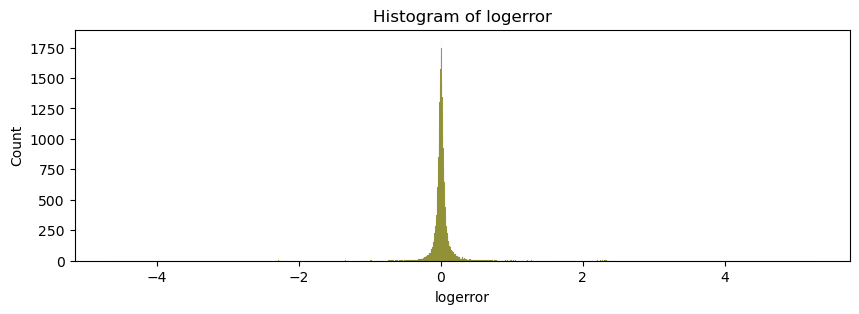

In [5]:
#Visually analysing every feature
#Visualization:Plotting the data,histograms or box plots, can help identify outliers visually.

histograms = wz.display_numeric_column_histograms(zillow)

Generate at least five questions or hypotheses related to the 'logerror' variable and other relevant columns. These questions should guide your exploration.


# Identify questions to answer, hypotheses to test.

### Ask Questions

### Set a target variable : logerror

 - 1. How Does Logerror Vary by tax amount? 

 - 2. Is the Distribution of Logerror Normal?

 - 3. Do Logerror Values Differ by County?

 - 4. How Does Logerror Vary by the Number of Bedrooms?

 - 5. How Does Logerror Vary by the Number of Bathrooms? 

5.

4.Explore how 'logerror' varies with different property characteristics, such as the number of bedrooms, square footage, or property type. Create scatter plots or correlation analyses to understand these relationships.
Are There Seasonal Trends in Logerror?

5.Investigate whether there are seasonal patterns in 'logerror.' For example, do log errors tend to be higher or lower during specific months or seasons? You can use line plots or time series analysis for this exploration.
Is There a Relationship Between Logerror and Property Location?

6.Explore whether the geographic location of a property, such as latitude and longitude, is related to 'logerror.' You can create spatial visualizations or perform spatial autocorrelation analysis.
These questions should provide a starting point for your data exploration, and you can further refine them based on your initial findings and insights from the dataset.







### Answer Questions

<div style="background: linear-gradient(to right, pink, olive);">
    <strong style="font-size: 20px;">1.How Does Logerror Vary by tax amount?   </strong>
</div>

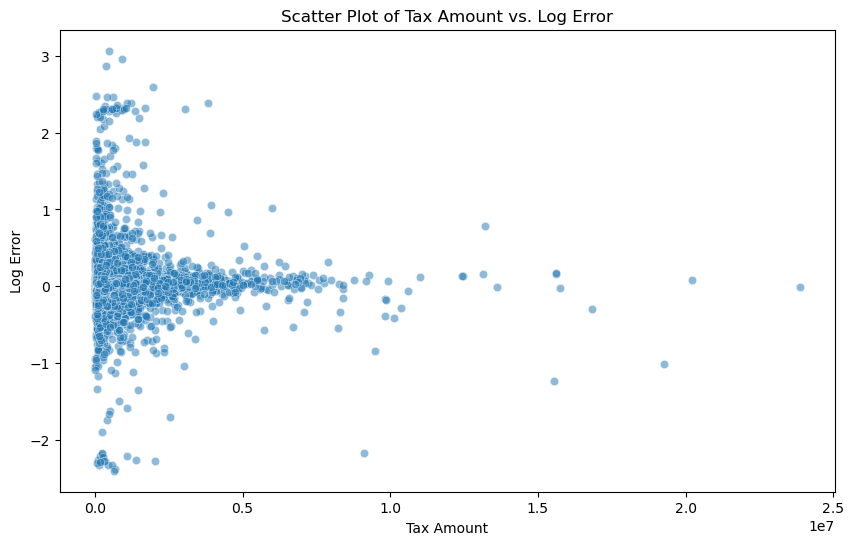

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='taxvalue', y='logerror', alpha=0.5)
plt.title('Scatter Plot of Tax Amount vs. Log Error')
plt.xlabel('Tax Amount')
plt.ylabel('Log Error')
plt.show()


Seems the range of logerror narrows down with increase in tax amount.This pattern suggests that as the 'tax amount' increases, the variability or spread in the 'logerror' values tends to decrease. 
 1. It could indicate that the model is more accurate or consistent when predicting the sale prices of properties with higher 'tax amounts,' regardless of their size. 
 2. Properties with higher 'tax amounts' may have more complete or accurate data, leading to more accurate predictions. Data quality can significantly impact predictive model performance.

To determine whether larger houses are easier to predict, we would need to conduct a more detailed analysis that includes additional variables, such as property size, and assess their impact on the model's performance.

Null Hypothesis (H0): The 'taxamount' does not have a statistically significant effect on 'logerror'i.e, 
there is no linear relationship between 'taxamount' and 'logerror'.

Alternative Hypothesis (H1): The 'taxamount' has a statistically significant effect on 'logerror' i.e, there is a linear relationship between 'taxamount' and 'logerror'.




In [67]:
# Add a constant term to the independent variables (intercept)
X = sm.add_constant(train[['taxvalue', 'area']])

# Dependent variable
y = train['logerror']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     54.26
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           3.02e-24
Time:                        12:26:04   Log-Likelihood:                 9411.2
No. Observations:               29031   AIC:                        -1.882e+04
Df Residuals:                   29028   BIC:                        -1.879e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.807e-05      0.002     -0.038      0.9

Relationship between the 'taxvalue' and 'logerror' variables, with data points colored based on the number of bedrooms in the properties.

<Figure size 1000x600 with 0 Axes>

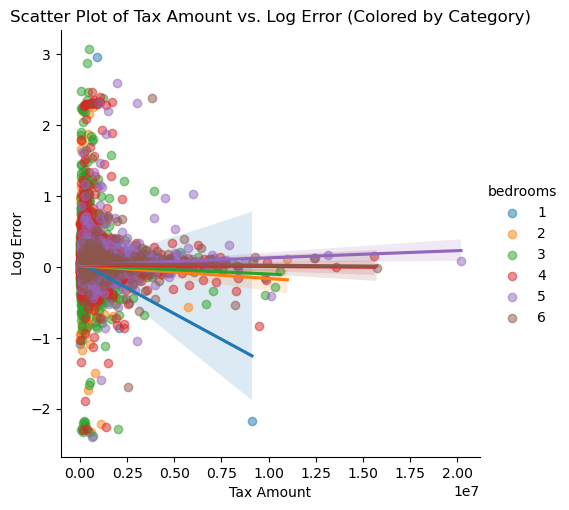

In [15]:
#visualize the relationship between "Tax Amount" and "Log Error" along with bedrooms 
plt.figure(figsize=(10, 6))

# Filter the 'train' DataFrame to include only rows with bedrooms between 0 and 6
filtered_train = train[(train['bedrooms'] >= 1) & (train['bedrooms'] <= 6)]

# Create an lmplot with filtered data
sns.lmplot(data=filtered_train, x='taxvalue', y='logerror', hue='bedrooms', scatter_kws={'alpha': 0.5})

plt.title('Scatter Plot of Tax Amount vs. Log Error (Colored by Category)')
plt.xlabel('Tax Amount')
plt.ylabel('Log Error')
plt.show()



<div style="background: linear-gradient(to right, pink, olive);">
    <strong style="font-size: 20px;">2.Is the Distribution of Logerror Normal?  </strong>
</div>

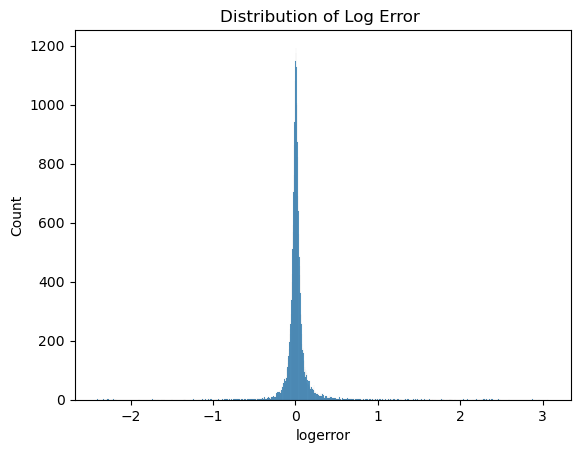

In [44]:
sns.histplot(data=train, x='logerror')
plt.title('Distribution of Log Error ')
plt.show()

(-1.0, 1.0)

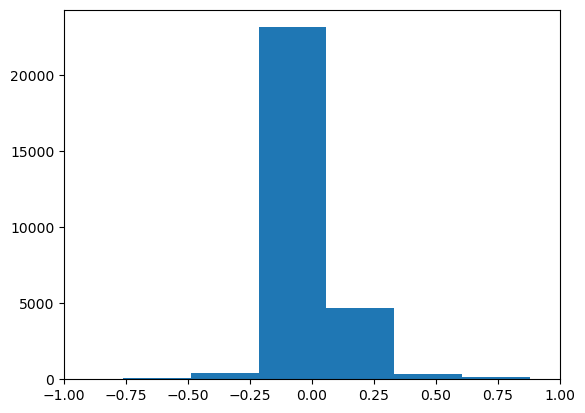

In [22]:
#Distribution of target variable
plt.hist(x=train['logerror'], bins=20)
plt.xlim(-1, 1)

Fail to reject the null hypothesis: The data is normally distributed.


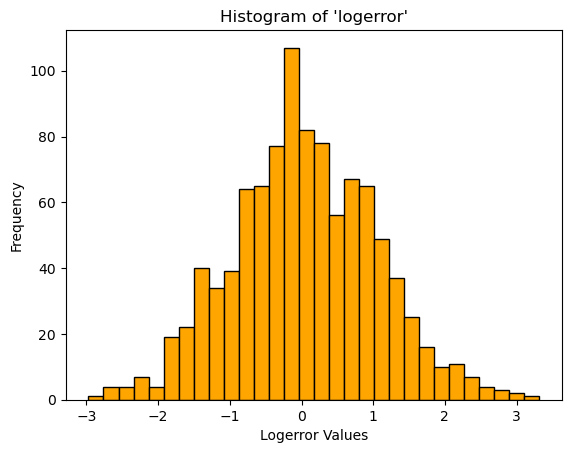

In [23]:

# Generate some sample logerror data 
train = np.random.normal(loc=0, scale=1, size=1000)

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(train)

# Set the significance level (alpha)
alpha = 0.05

# Check the normality based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

# Create a histogram to visualize the distribution
plt.hist(train, bins=30, color='orange', edgecolor='black')
plt.title("Histogram of 'logerror'")
plt.xlabel("Logerror Values")
plt.ylabel("Frequency")
plt.show()



<div style="background: linear-gradient(to right, pink, olive);">
    <strong style="font-size: 20px;">3. Do Logerror Values Differ by County?  </strong>
</div>



Approach:Explore the distribution of 'logerror' using a boxplot and assess whether it follows a normal distribution. 

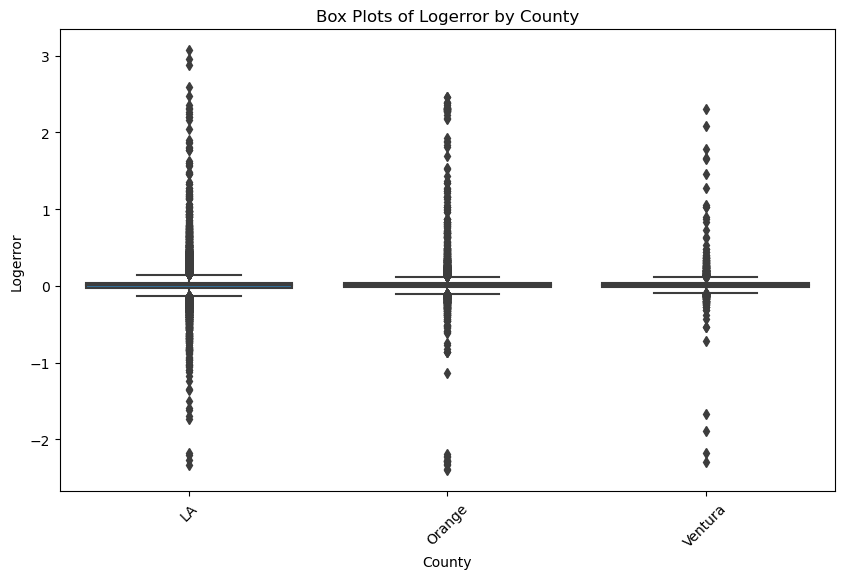

In [12]:
# Create box plots or violin plots of 'logerror' by county
plt.figure(figsize=(10, 6))
sns.boxplot(x='county', y='logerror', data=train)
plt.title('Box Plots of Logerror by County')
plt.xlabel('County')
plt.ylabel('Logerror')
plt.xticks(rotation=45)  
plt.show()




If the horizontal box in your box plot is very small, and the line inside the box (representing the median) is not visible, it typically means that the logerror values within that county have a very narrow range, and there may not be much variability in the data. This can happen when the logerror values are clustered closely together.

In such cases, the box plot may not provide as much insight into the central tendency (median) and spread (IQR) of the logerror values because these statistics are too tightly packed. It suggests that for that particular county, logerror values are relatively consistent and don't have a wide range of values.

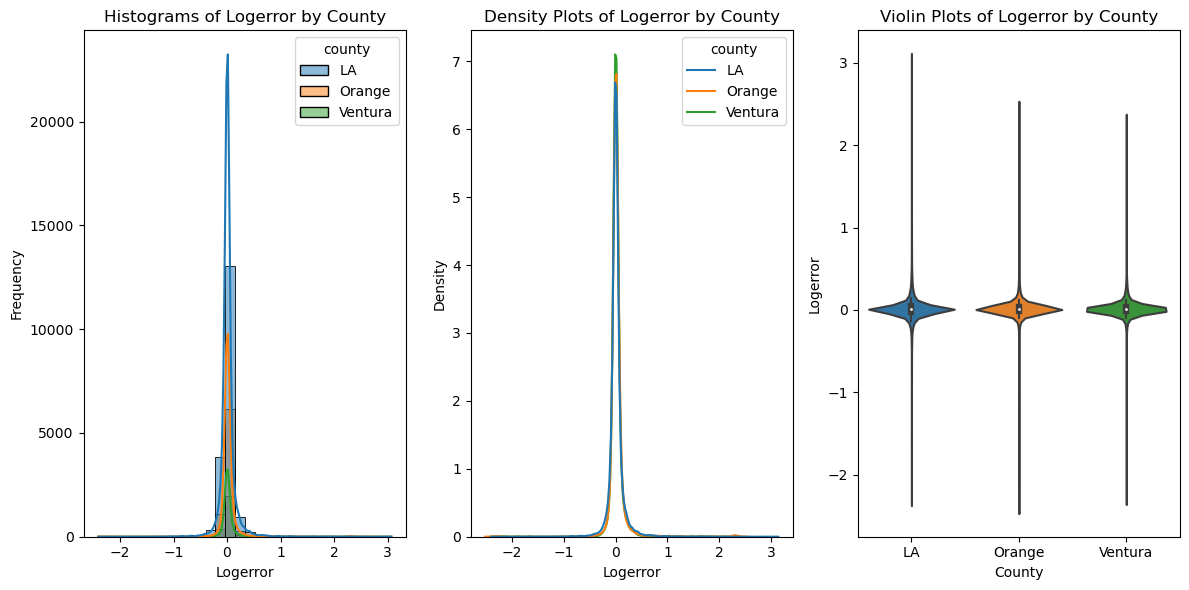

In [49]:

# Since box plot doesn't effectively convey the distribution characteristics due to very limited variability,
#Using visualization techniques like histograms, density plots, violin plots to get a more detailed view of the data

# Create subplots for histograms
plt.figure(figsize=(12, 6))

# Subplot 1: Histograms
plt.subplot(1, 3, 1)
sns.histplot(data=train, x='logerror', hue='county', kde=True, bins=30)
plt.title('Histograms of Logerror by County')
plt.xlabel('Logerror')
plt.ylabel('Frequency')

# Subplot 2: Density Plots (Kernel Density Estimation)
plt.subplot(1, 3, 2)
sns.kdeplot(data=train, x='logerror', hue='county', common_norm=False)
plt.title('Density Plots of Logerror by County')
plt.xlabel('Logerror')
plt.ylabel('Density')

# Subplot 3: Violin Plots
plt.subplot(1, 3, 3)
sns.violinplot(x='county', y='logerror', data=train)
plt.title('Violin Plots of Logerror by County')
plt.xlabel('County')
plt.ylabel('Logerror')

plt.tight_layout()
plt.show()


In the histogram the LA County has a sharp, pointy peak,which indicates that there is a concentration of logerror values around a specific value, means that a significant number of properties in that county have logerror values that are close to a particular value, and there isn't much variability or spread in the logerror values.

Orange County) has a peak that is not as sharp as LA's but still relatively concentrated around a specific value.

Ventura County) has a broader peak, indicating more variability in logerror values.

The peakiness or width of the distribution indicates the concentration or variability of logerror values, respectively. The highest point of the histogram indicates the most common logerror value in that county.




A density plot, displays the estimated probability density of a continuous variable.This plot suggests that logerror values tend to be centered around specific values for each county, and the distribution of logerror values is slightly different for each county, with Ventura County having the highest central logerror values. The color variation helps you distinguish the density of logerror values among the counties at different points along the distribution.



Each "violin" in the plot represents the distribution of logerror values for LA, Orange, and Ventura.A wider part of the violin represents a higher density of data points at that logerror value.Vertical line or marker inside the violin indicates the median (50th percentile) of the logerror values for that group. This line helps identify the central tendency of the data.The longer vertical line inside LA County's violin indicates that the median logerror value for LA County is higher than the medians for Orange County and Ventura County. 

In [ ]:
Stats Test:

Null Hypothesis (H0): The null hypothesis states that there are no significant differences in 'logerror' among the different counties i.e the mean 'logerror' is the same across all counties.

Alternative Hypothesis (H1): The alternative hypothesis states that there are significant differences in 'logerror' among the different counties i.e at least one county has a different mean 'logerror' compared to the others.LA County has a higher density of logerror values in certain regions of the distribution.

In [17]:
# Perform an ANOVA test to assess differences in 'logerror' by county
county = [group['logerror'] for name, group in train.groupby('county')]
f_statistic, p_value = stats.f_oneway(*county)

print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

ANOVA F-statistic: 10.514188457640985
ANOVA p-value: 2.7252045719908615e-05


The results of the ANOVA test indicate:

There are statistically significant differences in the 'logerror' variable among different counties.

The ANOVA F-statistic is approximately 10.5142, which suggests that there is a significant variation in 'logerror' among the counties.

The very small p-value (approximately 2.7252e-05) associated with the F-statistic indicates that these differences are highly unlikely to be due to random chance alone.


The p-value (2.7252e-05) is significantly smaller than a common significance level of 0.05. Therefore, we reject the null hypothesis. 


<div style="background: linear-gradient(to right, pink, olive);">
    <strong style="font-size: 20px;">4.How Does Logerror Vary by the Number of Bedrooms?  </strong>
</div>


 Approach:Explore the distribution of 'logerror' using a scatterplot,boxplot and violin plot and investigate whether there are significant differences in 'logerror' for the number of bedrooms. For stats test perform ANOVA.ANOVA is an appropriate choice as we are comparing 'logerror' across different categories of the number of bedrooms in properties.
 

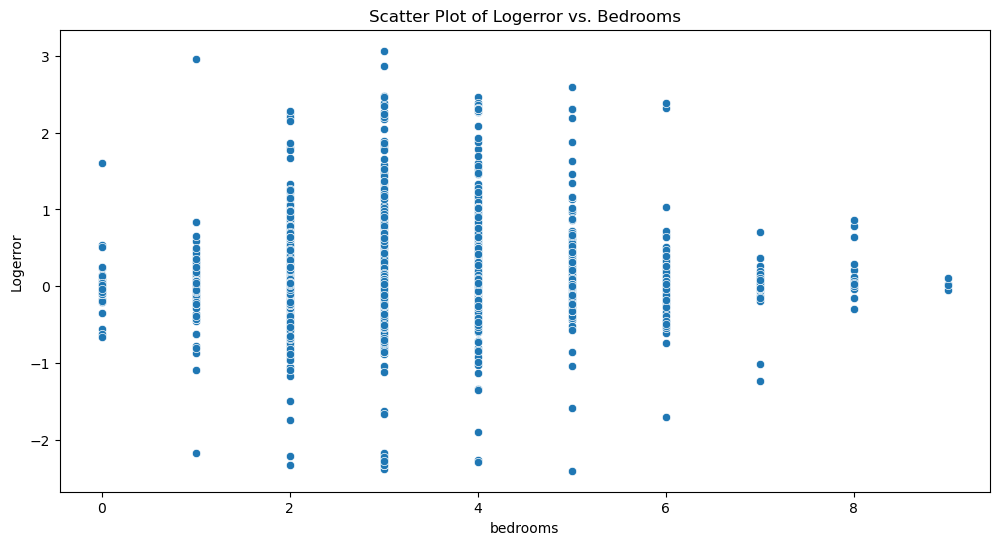

In [21]:
# Create scatter plots of 'logerror' vs. property characteristics
plt.figure(figsize=(12, 6))

# Example: Scatter plot of 'logerror' vs. 'bedroom_count'
sns.scatterplot(x='bedrooms', y='logerror', data=train)
plt.title('Scatter Plot of Logerror vs. Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Logerror')
plt.show()



Vertical lines in the scatter plot of 'logerror' vs. 'bedrooms' suggest that 'bedrooms' is likely a discrete or categorical variable, and the plot visualizes how 'logerror' varies among different bedroom counts.


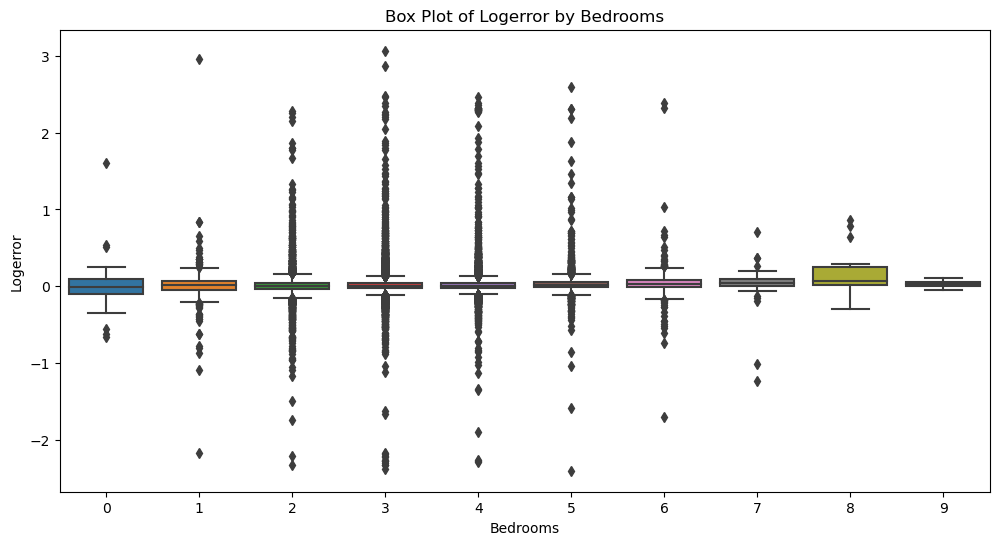

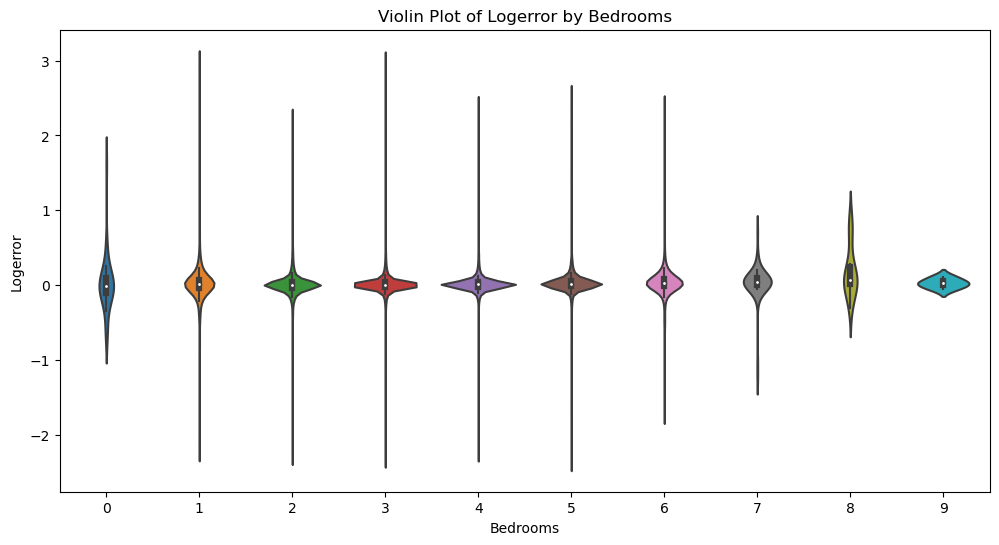

In [33]:

# Create box plot to visualize the distribution of 'logerror' by 'bedrooms'
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='logerror', data=train)
plt.title('Box Plot of Logerror by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Logerror')
plt.show()

# Create violin plot for a more detailed distribution view
plt.figure(figsize=(12, 6))
sns.violinplot(x='bedrooms', y='logerror', data=train)
plt.title('Violin Plot of Logerror by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Logerror')
plt.show()



In [31]:

# Create a list of 'logerror' values for each bedroom category
bedroom_categories = train['bedrooms'].unique()
bedroom_logs = [train[train['bedrooms'] == category]['logerror'] for category in bedroom_categories]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*bedroom_logs)

# Print the ANOVA results
print(f'ANOVA F-statistic: {f_statistic:.4f}')
print(f'ANOVA p-value: {p_value:.4f}')

# Interpret the results based on the p-value and significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in 'logerror' among bedroom categories")


ANOVA F-statistic: 6.7702
ANOVA p-value: 0.0000
Reject the null hypothesis: There are significant differences in 'logerror' among bedroom categories


"Reject the null hypothesis." This means that there are indeed significant differences in 'logerror' among the different bedroom categories. The analysis suggests that the  number of bedrooms in properties has a statistically significant effect on 'logerror,' and at least one bedroom category differs significantly from the others in terms of 'logerror.'





## 5. How Does Logerror Vary by the Number of Bathrooms? 

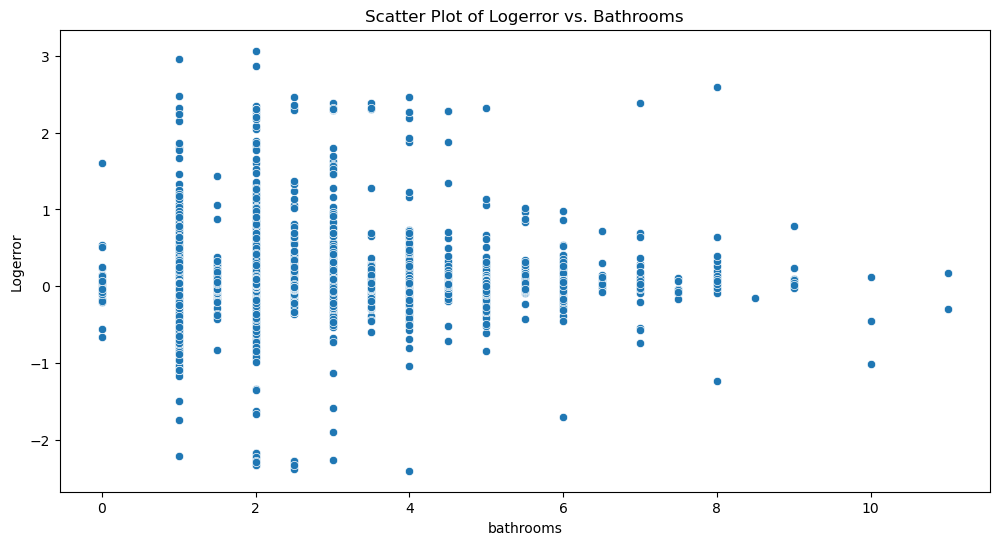

In [43]:
# Create scatter plots of 'logerror' vs. bathrooms
plt.figure(figsize=(12, 6))

# Example: Scatter plot of 'logerror' vs. 'bathrooms'
sns.scatterplot(x='bathrooms', y='logerror', data=train)
plt.title('Scatter Plot of Logerror vs. Bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Logerror')
plt.show()



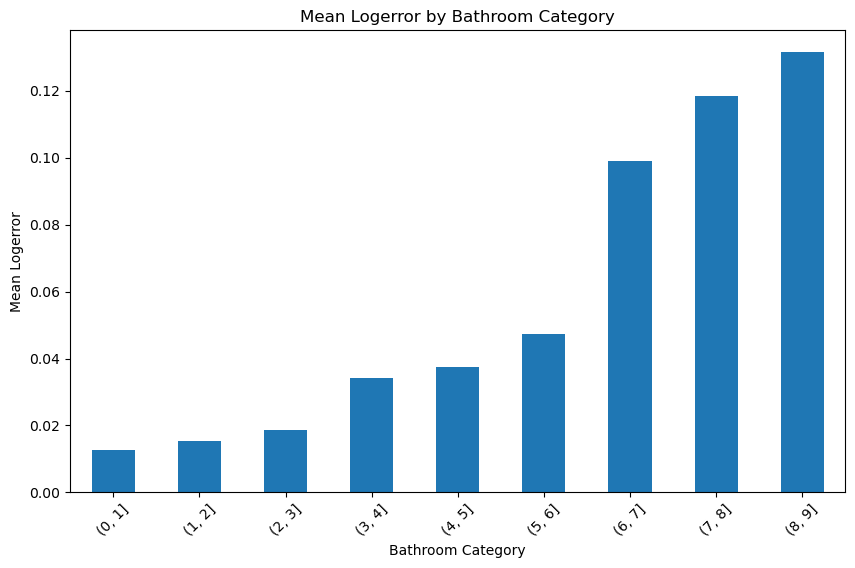

In [45]:

# Create bins for 'bathrooms'
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Define your own bins

# Bin the data and calculate the mean 'logerror' for each bin
train['bathroom_bins'] = pd.cut(train['bathrooms'], bins=bins)
mean_logerror_by_bin = train.groupby('bathroom_bins')['logerror'].mean()

# Create a bar plot of mean 'logerror' by bathroom category
plt.figure(figsize=(10, 6))
mean_logerror_by_bin.plot(kind='bar')
plt.title('Mean Logerror by Bathroom Category')
plt.xlabel('Bathroom Category')
plt.ylabel('Mean Logerror')
plt.xticks(rotation=45)
plt.show()


Left-skewed or having a negative skew. This means that the distribution of values is not symmetric, and the majority of values tend to be clustered towards the right or higher end of the chart, with fewer values extending towards the left or lower end.

Left-skewed,chart suggests that the majority of bathroom categories have higher mean 'logerror' values, and there may be one or a few bathroom categories with lower mean 'logerror' values, causing the skew.

Left-skew is also indicative of a distribution where extreme values (lower mean 'logerror') are present, and this can sometimes be caused by outliers or data points that deviate significantly from the majority of the data.



In [ ]:
Stats Test:

In [39]:
# Calculate the Pearson correlation coefficient between 'logerror' and 'bathrooms'
pearson_corr, _ = stats.pearsonr(train['logerror'], train['bathrooms'])
print(f'Pearson Correlation (logerror vs. bathrooms): {pearson_corr}')



Pearson Correlation (logerror vs. bathrooms): 0.03905422282079192


The Pearson correlation coefficient of 0.0391 between 'logerror' and 'bathrooms' suggests a very weak positive linear relationship. Other factors likely have a more substantial influence on 'logerror.'

<Figure size 1000x600 with 0 Axes>

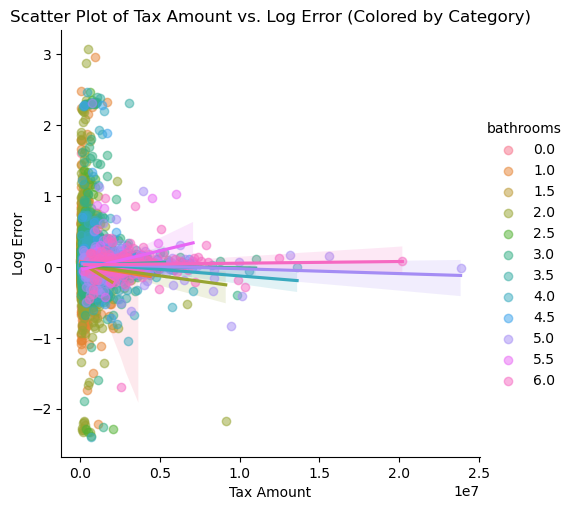

In [82]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=train[(train['bathrooms'] >= 0) & (train['bathrooms'] <= 6)], 
           x='taxvalue', y='logerror', hue='bathrooms', scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Tax Amount vs. Log Error (Colored by Category)')
plt.xlabel('Tax Amount')
plt.ylabel('Log Error')
plt.show()


# Setting bin values

Group similar values together and create meaningful categories by binning. When we have a large range of possible values it can help simplify the analysis and visualization of the variable.

In [85]:
train['logerror_bins'] = pd.cut(train.logerror,[-5,  -0.5, 0.5, 5], labels=['under_neg_one', 'zero', 'over_one'])


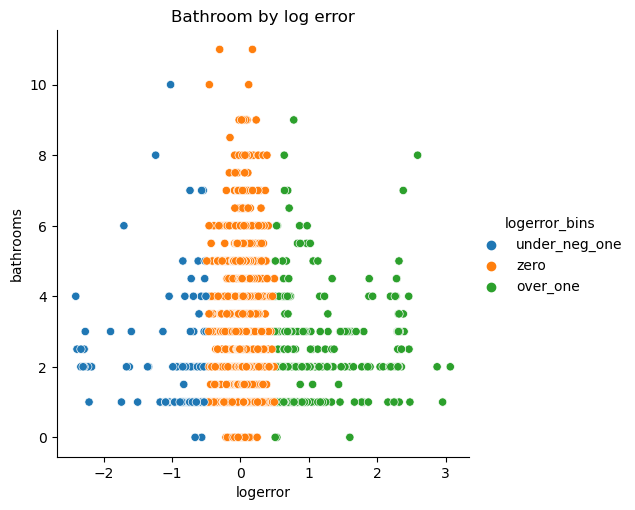

In [95]:
sns.relplot(
    data=train, 
    y='bathrooms', 
    x='logerror',
    hue='logerror_bins')
plt.title('Bathroom by log error')
plt.show()

There is a concentration of data points labeled as "zero" log error for homes with varying numbers of bathrooms. This suggests that a significant portion of the data has relatively accurate predictions or assessments of tax values.

This visual provides an overview of the distribution of log errors across different bathroom counts but does not provide enough evidence to conclude that the number of bathrooms directly determines log error accuracy.

## 6. How Does Logerror Vary by area? 

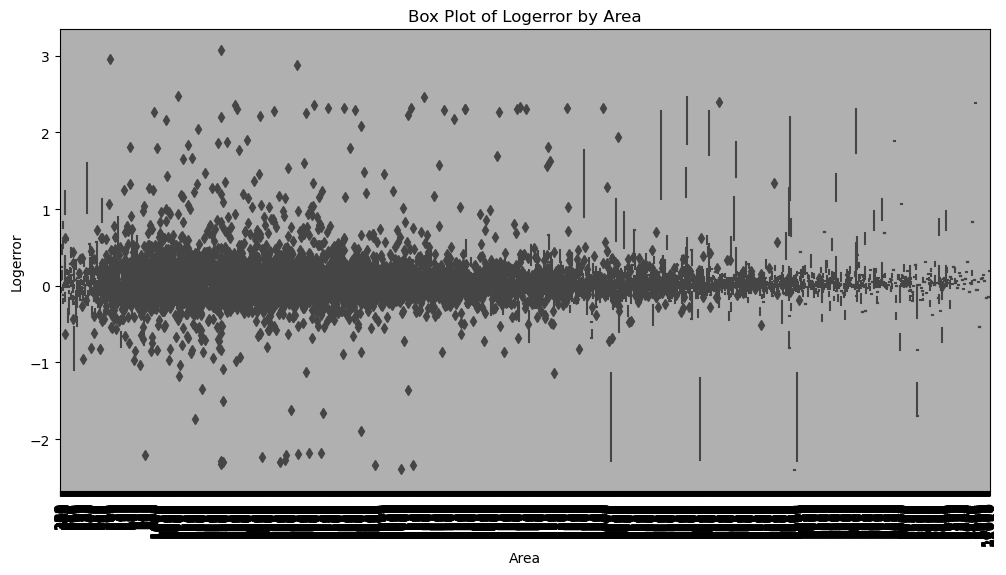

In [46]:
# Create a box plot of 'logerror' by 'area'
plt.figure(figsize=(12, 6))
sns.boxplot(x='area', y='logerror', data=train)
plt.title('Box Plot of Logerror by Area')
plt.xlabel('Area')
plt.ylabel('Logerror')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()


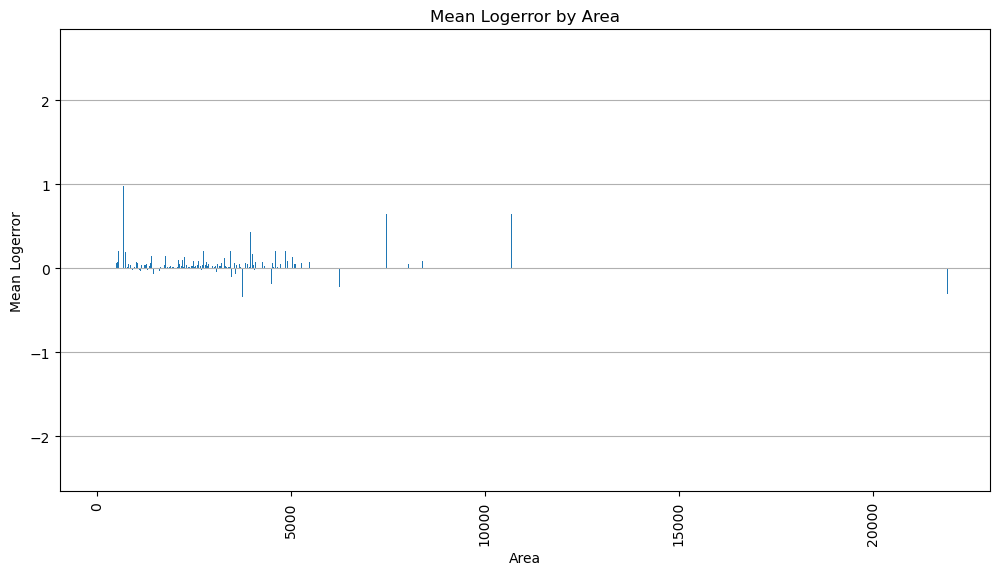

In [48]:

# Calculate the mean 'logerror' for each 'area'
mean_logerror_by_area = train.groupby('area')['logerror'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_logerror_by_area['area'], mean_logerror_by_area['logerror'])
plt.title('Mean Logerror by Area')
plt.xlabel('Area')
plt.ylabel('Mean Logerror')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


In [47]:
# Perform ANOVA to assess differences in 'logerror' by 'area'
areas = train['area'].unique()
area_logs = [train[train['area'] == area]['logerror'] for area in areas]

f_statistic, p_value = stats.f_oneway(*area_logs)

# Print the ANOVA results
print(f'ANOVA F-statistic: {f_statistic:.4f}')
print(f'ANOVA p-value: {p_value:.4f}')

# Interpret the results based on the p-value and significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in 'logerror' among areas.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in 'logerror' among areas.")


ANOVA F-statistic: 1.5104
ANOVA p-value: 0.0000
Reject the null hypothesis: There are significant differences in 'logerror' among areas.


The geographic area of a property has a statistically significant effect on 'logerror,' and at least one area differs significantly from the others in terms of 'logerror.'





# Exploring the impact of taxvalue by logerror in single family residential in different counties

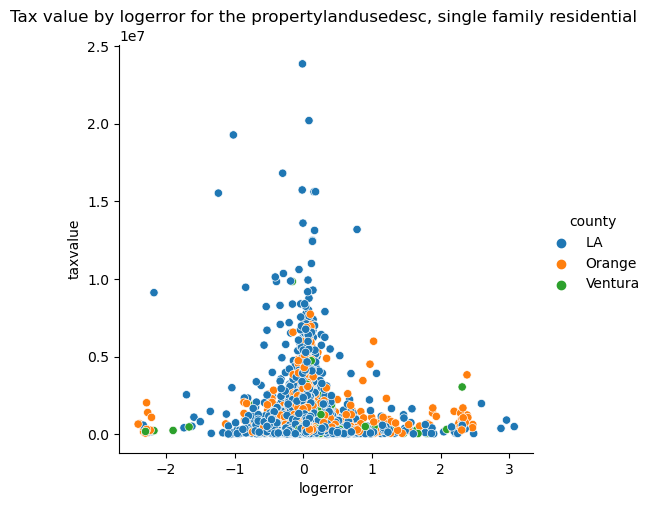

In [72]:
sns.relplot(
    data=train, 
    x='logerror', 
    y='taxvalue', 
    hue='county',
    col='propertylandusedesc')
plt.title('Tax value by logerror for the propertylandusedesc, single family residential ')
plt.show()

The estimated tax values for properties in LA County tend to deviate more from the actual tax values compared to properties in other counties.

# Exploring the impact of lotsqft by logerror in different counties

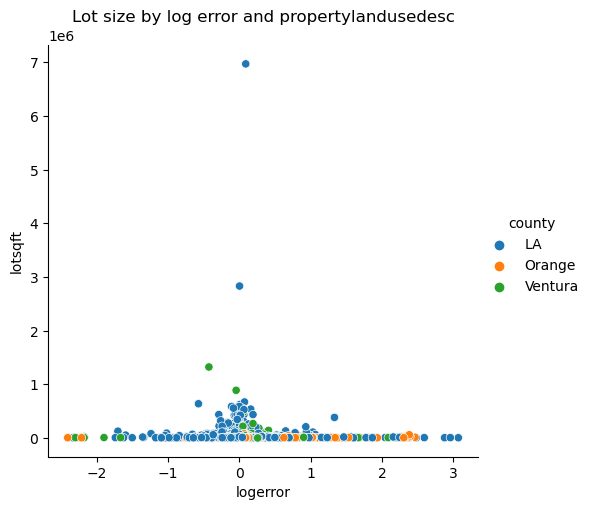

In [68]:
sns.relplot(
    data=train, 
    y='lotsqft', 
    x='logerror', 
    hue='county')
    
plt.title('Lot size by log error and propertylandusedesc')
plt.show()

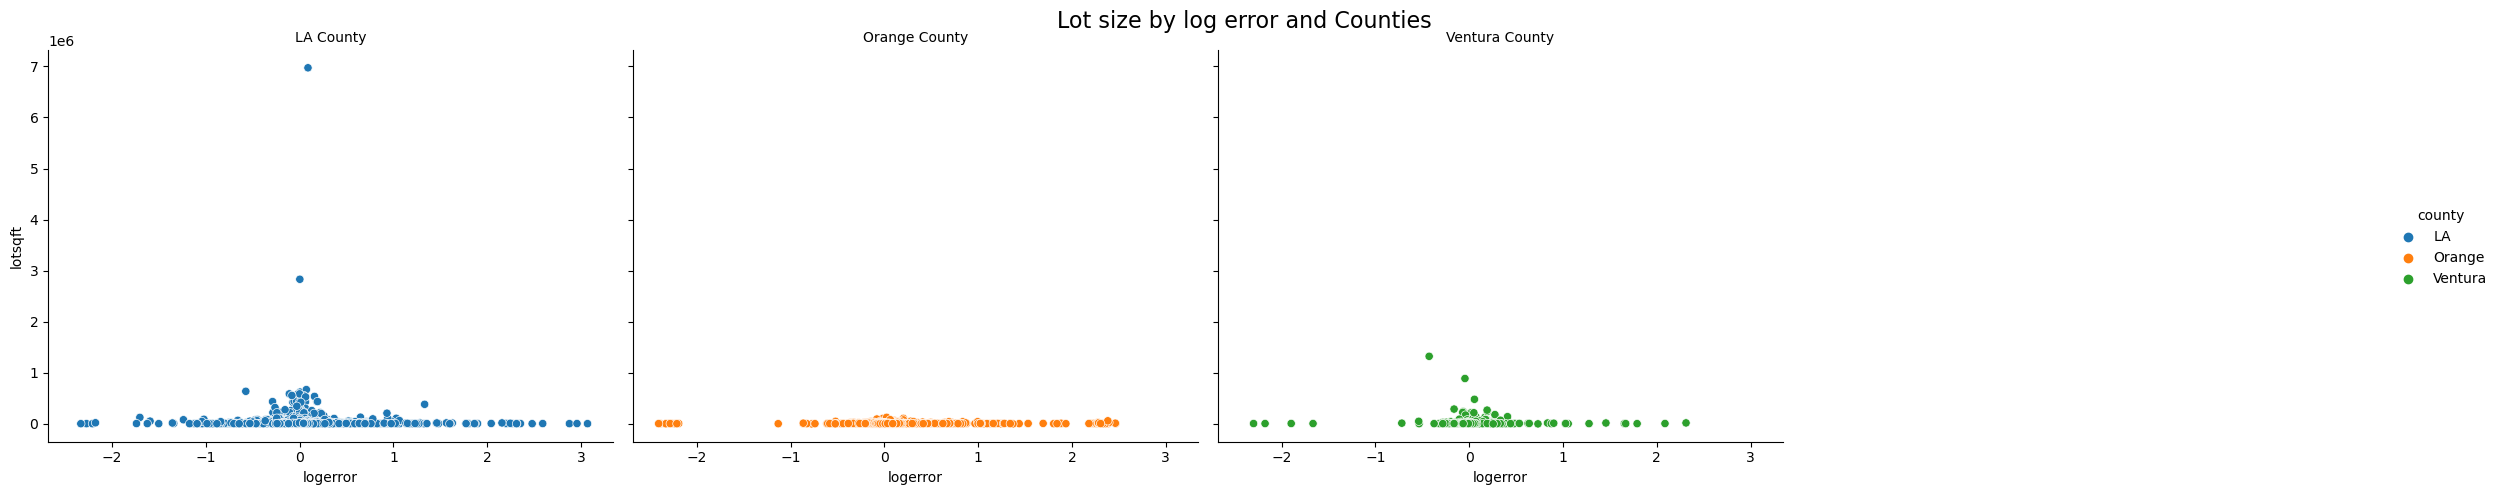

In [69]:

# Create a relplot with col='county' and a larger figsize
g = sns.relplot(
    data=train, 
    y='lotsqft', 
    x='logerror', 
    hue='county',
    col='county',
    col_wrap=4,  # Set col_wrap to control the number of columns
    height=5,   # Adjust the height of each subplot
    aspect=1.2) # Adjust the aspect ratio for a wider plot

# Set titles for each subplot
g.set_titles(col_template="{col_name} County")

# Add a common title to the entire figure
plt.subplots_adjust(top=0.9)  # Adjust the top spacing for the title
g.fig.suptitle('Lot size by log error and Counties', fontsize=16)

plt.show()


LA homes seems to have higher logerror as lotsqft increases.It suggests that there may be a decrease in the accuracy of the estimated tax values for larger properties in Los Angeles. 

# Exploring the impact of Tax value by logerror in different counties

# create bins

In [51]:
train['logerror_bins'] = pd.cut(train.logerror, [-0.6, -0.3, 0, 0.3, 0.6], labels=['very_negative', 'negative', 'positive', 'very_positive'])


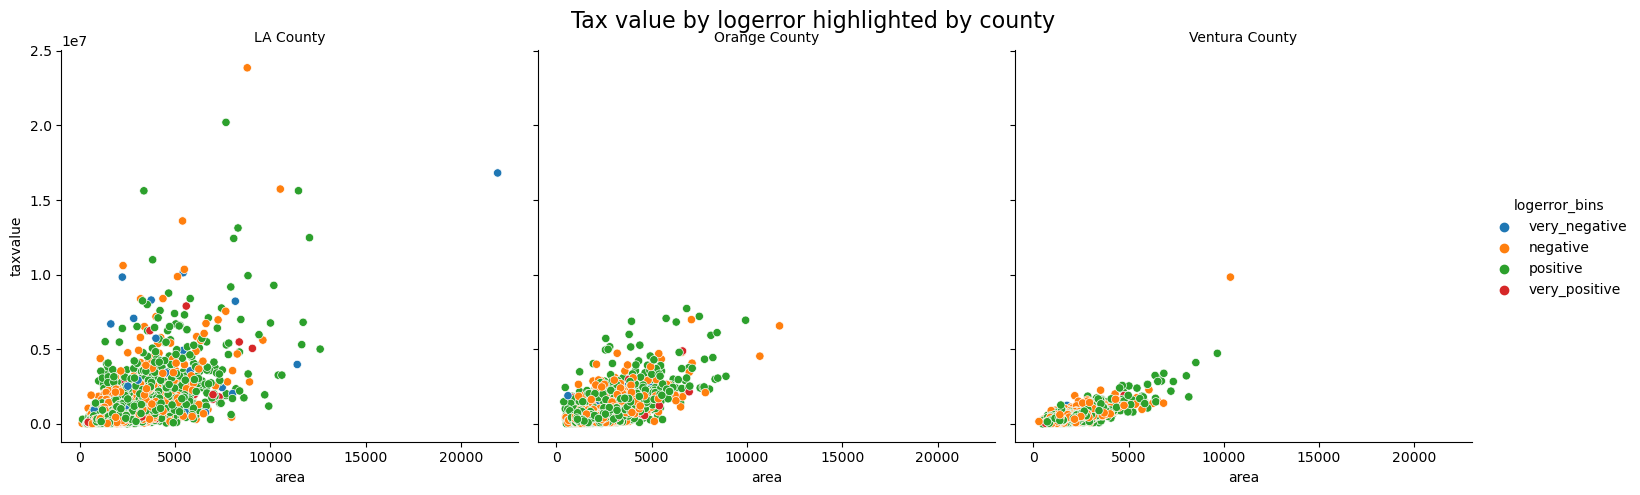

In [56]:

# Create a relplot with col='county'
g = sns.relplot(
    data=train, 
    x='area', 
    y='taxvalue', 
    hue='logerror_bins', 
    col='county')

# Set titles for each subplot
g.set_titles(col_template="{col_name} County")

# Add a common title to the entire figure
plt.subplots_adjust(top=0.9)  # Adjust the top spacing for the title
g.fig.suptitle('Tax value by logerror highlighted by county', fontsize=16)

plt.show()


In [ ]:
# setting another bin values

In [57]:
train['logerror_bins'] = pd.cut(train.logerror,[-5,  -0.5, 0.5, 5], labels=['under_neg_one', 'zero', 'over_one'])
train.head().T


,1926,27526,17570,4657,6654
unnamed:_0,1926,27527,17571,4657,6654
id,957783,221190,1291832,706252,1196157
parcelid,11278278,14391898,12831131,11829226,11192125
bathrooms,2.0,3.0,1.0,1.0,3.0
bedrooms,3,5,3,3,4
calculatedbathnbr,2.0,3.0,1.0,1.0,3.0
area,1238,2869,1425,1363,1871
finishedsquarefeet12,1238.0,2869.0,1425.0,1363.0,1871.0
county,LA,Orange,LA,LA,LA
fullbathcnt,2.0,3.0,1.0,1.0,3.0


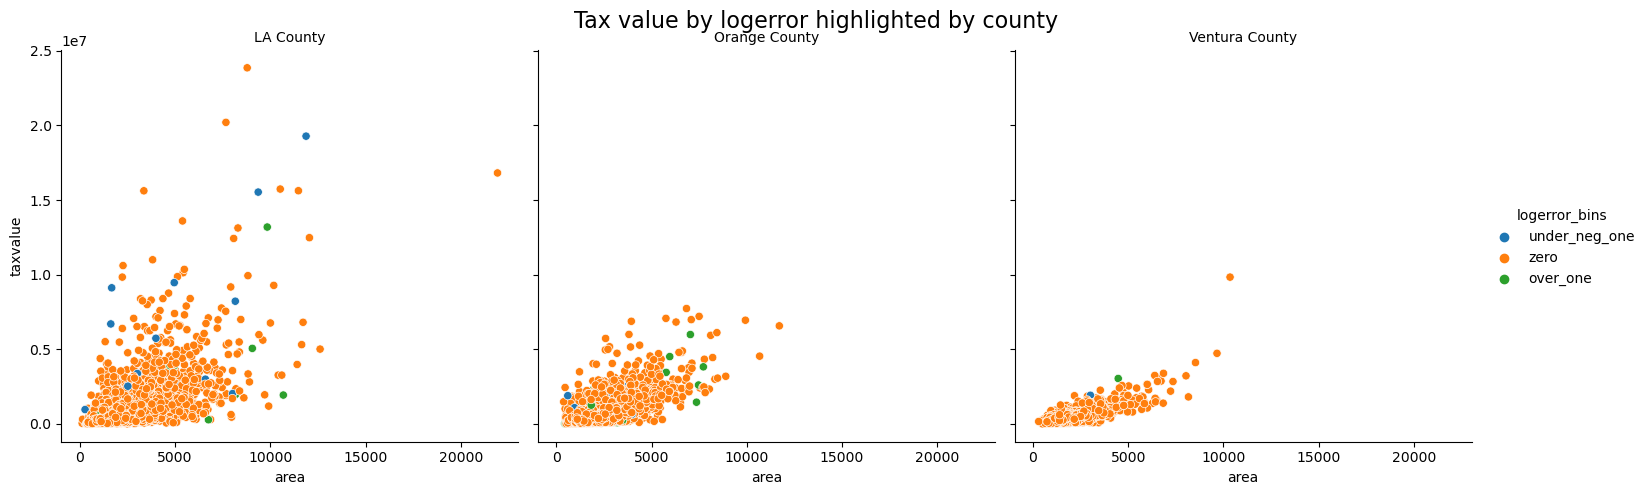

In [58]:
# Create a relplot with col='county'
g = sns.relplot(
    data=train, 
    x='area', 
    y='taxvalue', 
    hue='logerror_bins', 
    col='county')

# Set titles for each subplot
g.set_titles(col_template="{col_name} County")

# Add a common title to the entire figure
plt.subplots_adjust(top=0.9)  # Adjust the top spacing for the title
g.fig.suptitle('Tax value by logerror highlighted by county', fontsize=16)

plt.show()


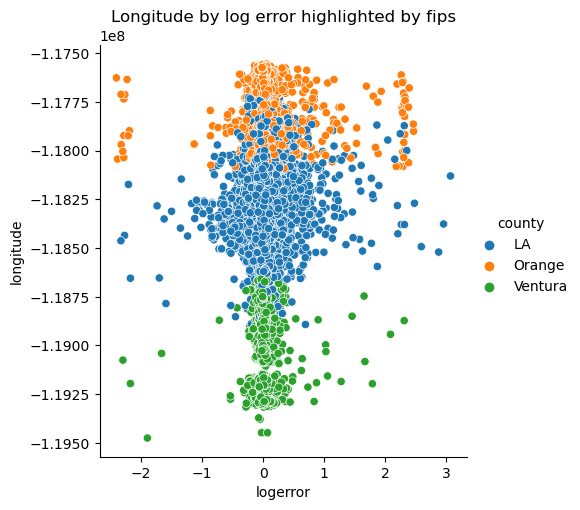

In [74]:
sns.relplot(
    data=train, 
    y='longitude', 
    x='logerror',
    hue='county')
plt.title('Longitude by log error highlighted by fips')
plt.show()


There are distinct patterns or differences in log error between Ventura and Orange Counties, but LA County has log error values that are less clearly associated with either county.

Log error alone may not be a reliable indicator for distinguishing properties in LA County from those in Ventura and Orange Counties when looking at their longitude values.

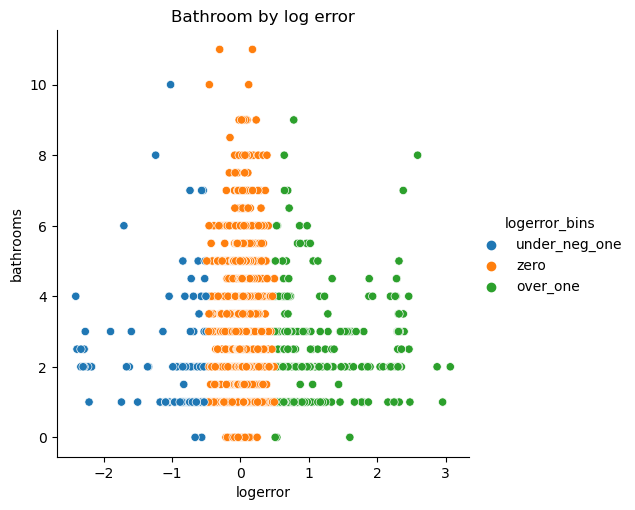